In [1]:
import utils
import pathlib

dataset_name = 'test'

data_folder = pathlib.Path('../data')
json_folder = data_folder / 'json'

xml_file   = data_folder / f'xml/{dataset_name}.xml'
json_file  = json_folder / f'{dataset_name}.json'
extra_file = json_folder / f'movie_additional.json'
es_folder  = data_folder / 'es_sw'

# utils.xml_to_ndjson(xml_file, json_folder, es_folder, extra_file)
utils.xml_to_json(xml_file, json_file)

## Data Analysis

In [47]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [35]:
train = Path('../data/json/train.json')
test = Path('../data/json/test.json')
dev = Path('../data/json/dev.json')

train_data = pd.read_json(train)
test_data = pd.read_json(test)
dev_data = pd.read_json(dev)
# reviews = data['commentaire']
# reviews_len = np.array([len(r) for r in reviews])

In [36]:
train_movies = train_data['movie']
train_movies = np.unique([movie['id'] for movie in train_movies])

test_movies = test_data['movie']
test_movies = np.unique([movie['id'] for movie in test_movies])

dev_movies = dev_data['movie']
dev_movies = np.unique([movie['id'] for movie in dev_movies])

In [37]:
print(len(train_movies))
print(len(test_movies))
print(len(dev_movies))

3202
450
448


In [39]:
np.intersect1d(np.concatenate([train_movies, dev_movies]), test_movies)
#np.isin(test_movies, train_movies)

array([], dtype='<U6')

In [43]:
movies = np.concatenate([train_movies, dev_movies, test_movies])
movies_u = np.unique(movies)

In [48]:
json_str = json.dumps(movies.tolist())

In [50]:
with open("../data/json/movies.json", "w") as f: 
    f.write(json_str) 

In [40]:
train_users = np.unique(train_data['user_id'])
test_users = np.unique(test_data['user_id'])
dev_users = np.unique(dev_data['user_id'])

In [41]:
print(len(train_users))
print(len(test_users))
print(len(dev_users))

119666
29255
35344


In [42]:
len(np.intersect1d(np.concatenate([train_users, dev_users]), test_users))

21117

In [51]:
users = np.concatenate([train_users, dev_users, test_users])
users_u = np.unique(users)

In [52]:
len(users_u)

140046

In [53]:
json_str = json.dumps(users_u.tolist())
with open("../data/json/users.json", "w") as f: 
    f.write(json_str) 

In [34]:
test_data

,review_id,name,user_id,commentaire,movie
0,review_59354742,gimliamideselfes,Z20040827093310567684711,"12 jours, un film que j'ai raté à sa sortie et...",{'id': '253727'}
1,review_62570109,Yetcha,Z20030318104639813779116,Ces lueurs dans ces yeux... Soit ils sont tous...,{'id': '253727'}
2,review_58180650,TTNOUGAT,Z20071021153249553451578,Il s’agit d’un documentaire sans la moindre ac...,{'id': '253727'}
3,review_57696986,titicaca120,Z20060317115155370578365,un documentaire magnifique dans cette unité ly...,{'id': '253727'}
4,review_57736972,velocio,Z20040630141522227308769,"Un documentaire très intéressant, quand bien m...",{'id': '253727'}
...,...,...,...,...,...
85842,review_57275608,Rom A,Z20120217154308300922168,"UnThor aux cheveux courts, un Hulk qui parle, ...",{'id': '223252'}
85843,review_57288594,Zoé T.,Z20171104180909770373557,Le casting correspond bien au film mais ça doi...,{'id': '223252'}
85844,review_57313027,Elisa G,Z20121226181848567456295,Très bon film. Bon effets spéciaux. Il manquai...,{'id': '223252'}
85845,review_57321607,Kevin Quesnel,Z20111024122936830511478,le film est superbe ! avec pas mal d'action co...,{'id': '223252'}


In [6]:
# print all stats
print(f"min : {np.min(reviews_len)} ")
print(f"max: {np.max(reviews_len)} ")
print(f"mean: {np.mean(reviews_len)} ")
print(f"std: {np.std(reviews_len)} ")
print(f"median: {np.median(reviews_len)} ")
print(f"Q1: {np.percentile(reviews_len, 25)} ")
print(f"Q3: {np.percentile(reviews_len, 75)} ")

min : 1 
max: 29667 
mean: 615.1250296563468 
std: 800.7778263138723 
median: 349.0 
Q1: 186.0 
Q3: 715.0 


/home/jarod/anaconda3/envs/innovation/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


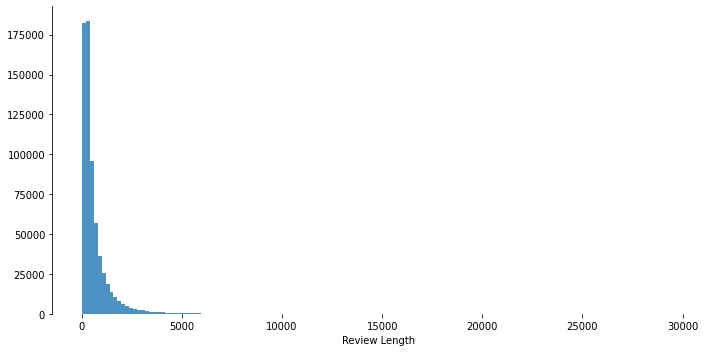

In [7]:
plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()

In [9]:
THRESHOLD = 2000
short_reviews = data[reviews_len <= THRESHOLD]
long_reviews =  data[reviews_len > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(data)
))

33726 reviews with LEN > 2000 (5.06 % of total data)


In [10]:
long_reviews.head(1)

,review_id,name,user_id,commentaire,movie,note
1,review_59303833,this is my movies,Z20051220181957240298347,"(...) En soi, je n'ai rien contre ce genre de ...",{'id': '229864'},3.5


/home/jarod/anaconda3/envs/innovation/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


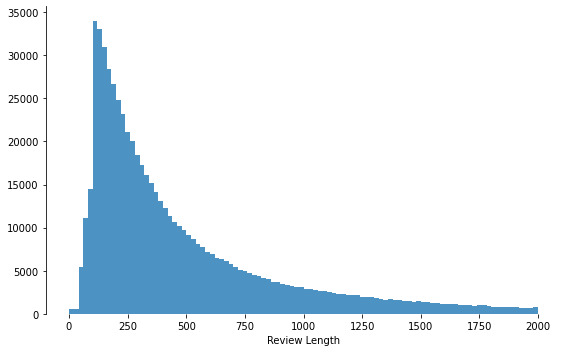

In [11]:
short_reviews_length = short_reviews['commentaire'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
#fig.savefig('img/short_reviews_length.png', dpi=200)